In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!wget https://raw.githubusercontent.com/ml-mipt/ml-mipt-part1/master/2017/seminars/493/dataset1.tsv
!wget https://raw.githubusercontent.com/ml-mipt/ml-mipt-part1/master/2017/seminars/493/dataset2.tsv

--2017-03-28 12:39:01--  https://raw.githubusercontent.com/ml-mipt/ml-mipt-part1/master/2017/seminars/493/dataset1.tsv
Resolving raw.githubusercontent.com... 151.101.0.133, 151.101.192.133, 151.101.64.133, ...
Connecting to raw.githubusercontent.com|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 448467 (438K) [text/plain]
Saving to: ‘dataset1.tsv.1’

dataset1.tsv.1      100%[===================>] 437.96K  1.60MB/s    in 0.3s    

2017-03-28 12:39:02 (1.60 MB/s) - ‘dataset1.tsv.1’ saved [448467/448467]

--2017-03-28 12:39:02--  https://raw.githubusercontent.com/ml-mipt/ml-mipt-part1/master/2017/seminars/493/dataset2.tsv
Resolving raw.githubusercontent.com... 151.101.0.133, 151.101.192.133, 151.101.64.133, ...
Connecting to raw.githubusercontent.com|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3371540 (3.2M) [text/plain]
Saving to: ‘dataset2.tsv.1’

dataset2.tsv.1      100%[===================>]   3.21M  

In [5]:
df = pd.read_csv("dataset1.tsv", sep="\t")

In [6]:
import re

def clean_text(text):
    only_alphabetical = re.sub("[^a-zA-Z0-9 ]+", "", text)
    with_folded_whitespaces = re.sub("\s+", " ", only_alphabetical)
    lowered_text = with_folded_whitespaces.lower()
    
    return lowered_text

In [7]:
assert clean_text("THE DA VINCI CODE is AN AWESOME BOOK") == "the da vinci code is an awesome book"
assert clean_text("ASDASD131231gs...as,da,s,,313-----sad  asdadasa") == "asdasd131231gsasdas313sad asdadasa"
assert not clean_text(".....___----****&&&^^")

In [8]:
df["text"] = df.text.apply(clean_text)
df.head()

,positive,text
0,1,this was the first clive cussler ive ever read...
1,1,i liked the da vinci code a lot
2,1,i liked the da vinci code a lot
3,1,i liked the da vinci code but it ultimatly did...
4,1,thats not even an exaggeration and at midnight...


In [13]:
from nltk.stem import PorterStemmer

st = PorterStemmer()

def stem_text(text):
    words = text.split()
    words = [st.stem(word) for word in words]
    return " ".join(words)

stem_text("i liked the da vinci code a lot")

'i like the da vinci code a lot'

In [15]:
assert stem_text("i liked the da vinci code a lot") == "i like the da vinci code a lot"
assert (stem_text("this prevents urllib3 from configuring ssl appropriately and may cause certain ssl connections to fail") ==
        "thi prevent urllib3 from configur ssl appropri and may caus certain ssl connect to fail")

In [17]:
print("Unique words before stemming:", np.unique(" ".join(df.text.values).split()).shape[0])
df.text = df.text.apply(stem_text)
print("Unique words after stemming:", np.unique(" ".join(df.text.values).split()).shape[0])

Unique words before stemming: 2325
Unique words after stemming: 2037


In [18]:
texts = df.text
labels = df.positive

# Experimenting...

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer, FeatureHasher

0.958067890423
1  -  the da vinci code is an amaz book do not get me wrong
0  -  the da vinci code is an amaz book do not get me wrong
0.95994748523
1  -  the da vinci code is an amaz book do not get me wrong
0  -  the da vinci code is an amaz book do not get me wrong


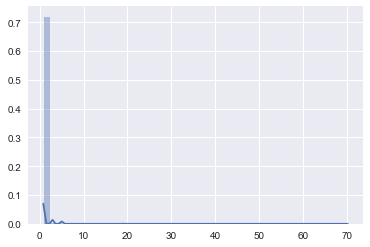

In [73]:
transformer = CountVectorizer(input="content", analyzer="word")
matrix = transformer.fit_transform(texts)

sns.distplot(matrix.data)

for classifier in [LogisticRegression, LinearSVC]:
    clf = classifier()
    print(cross_val_score(clf, matrix, labels, scoring="accuracy").mean())
    print(preds[10], ' - ', texts[i])
    print(preds[6915], ' - ', texts[i])

0.905429829067
1  -  the da vinci code is an amaz book do not get me wrong
0  -  the da vinci code is an amaz book do not get me wrong
0.953152987052
1  -  the da vinci code is an amaz book do not get me wrong
0  -  the da vinci code is an amaz book do not get me wrong


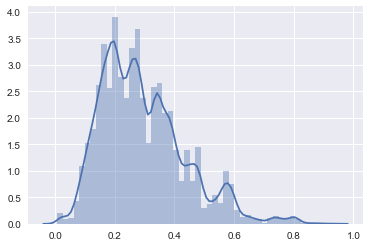

In [65]:
transformer = TfidfTransformer()
tf_idfed_matrix = transformer.fit_transform(matrix)

sns.distplot(tf_idfed_matrix.data)

for classifier in [LogisticRegression, LinearSVC]:
    clf = classifier()
    print(cross_val_score(clf, tf_idfed_matrix, labels, scoring="accuracy").mean())
    print(preds[10], ' - ', texts[i])
    print(preds[6915], ' - ', texts[i])

0.956911361414
1  -  the da vinci code is an amaz book do not get me wrong
0  -  the da vinci code is an amaz book do not get me wrong
0.957634489925
1  -  the da vinci code is an amaz book do not get me wrong
0  -  the da vinci code is an amaz book do not get me wrong


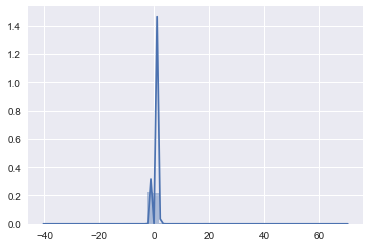

In [84]:
transformer = FeatureHasher(input_type='string', n_features=3500)
matrix = transformer.fit_transform(map(lambda x: x.split(), texts)) # в случае FeatureHasher

sns.distplot(matrix.data)

for classifier in [LogisticRegression, LinearSVC]:
    clf = classifier()
    print(cross_val_score(clf, matrix, labels, scoring="accuracy").mean())
    clf.fit(matrix, labels)
    print(preds[10], ' - ', texts[i])
    print(preds[6915], ' - ', texts[i])